In [2]:
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth',None)
import re
import ast
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [91]:
df = pd.read_excel ('Tier A.xlsx')

In [92]:
a=['countyId','zipcode', 'zestimate','lotAreaValue',
       'rentZestimate','bedrooms', 'bathrooms', 'livingAreaValue', 
       'lastSoldPrice', 'zestimateLowPercent', 'zestimateHighPercent',
       'restimateLowPercent', 'restimateHighPercent', 
       'taxAssessedValue', 'taxAssessedYear', 
       'propertyTaxRate',  
       'resoFacts_hasFireplace', 'resoFacts_parking',
       'mortgageRates_thirtyYearFixedRate',
       'mortgageRates_fifteenYearFixedRate', 'mortgageRates_arm5Rate', 
    'city', 'county' , 'description','parentRegion_name',
    'dateSoldString', 'resoFacts_daysOnZillow', 'resoFacts_flooring', 'resoFacts_hasAttachedProperty',
    'resoFacts_hasGarage', 'resoFacts_hasPetsAllowed', 'resoFacts_hasSpa' , 'resoFacts_hasView','resoFacts_hoaFee',
     'resoFacts_pricePerSquareFoot','resoFacts_yearBuilt' ,'solarPotential_sunScore','schools'
   ]

In [93]:
df=df[a]

In [94]:
df.shape

(742, 38)

In [95]:
df.isnull().sum().sum()

2782

# Data Cleaning and Null Values removal

In [96]:
df['resoFacts_hoaFee'].fillna(df['resoFacts_hoaFee'].mode()[0], inplace=True)
hoe=[]
for x in df['resoFacts_hoaFee']:
    x=str(x).replace(",","")
    hoe.append(int(re.findall('[0-9,]+', x)[0]))
df['resoFacts_hoaFee']=hoe   

In [97]:
df['resoFacts_flooring'].fillna(df['resoFacts_flooring'].mode()[0], inplace=True)
flooring=[]
for x in df['resoFacts_flooring']:
    x=x.replace('[',"")
    flooring.append(x.replace(']',""))
df['resoFacts_flooring']= flooring

In [98]:
df_cat= df.select_dtypes(exclude='number')
print(df_cat.shape)

(742, 6)


In [99]:
print(df_cat.isnull().sum())

city                  0
county                0
description           2
parentRegion_name     2
resoFacts_flooring    0
schools               4
dtype: int64


In [100]:
for column in df_cat:
    df_cat[column].fillna(df_cat[column].mode()[0], inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [101]:
print(df_cat.isnull().sum().sum())

0


In [102]:
discrete_cols= ["bedrooms", "bathrooms", "resoFacts_hasFireplace", "resoFacts_parking", "resoFacts_daysOnZillow" ,"resoFacts_hasAttachedProperty" , "resoFacts_hasGarage" , "resoFacts_hasPetsAllowed", "resoFacts_hasSpa", "resoFacts_hasView", "resoFacts_yearBuilt"]

In [103]:
numeric_cols=["lotAreaValue","zestimate","rentZestimate", "livingAreaValue", "lastSoldPrice", "zestimateLowPercent", "zestimateHighPercent", "restimateLowPercent" ,"restimateHighPercent" , "taxAssessedValue" , "propertyTaxRate", "resoFacts_hoaFee", "resoFacts_pricePerSquareFoot" , "solarPotential_sunScore"]

In [104]:
df_discrete=df[discrete_cols]
df_num=df[numeric_cols]

In [105]:
df_num.isnull().sum()

lotAreaValue                     58
zestimate                       169
rentZestimate                   122
livingAreaValue                   9
lastSoldPrice                   222
zestimateLowPercent             169
zestimateHighPercent            169
restimateLowPercent             177
restimateHighPercent            177
taxAssessedValue                134
propertyTaxRate                   2
resoFacts_hoaFee                  0
resoFacts_pricePerSquareFoot     37
solarPotential_sunScore         146
dtype: int64

In [106]:
from sklearn.impute import KNNImputer   # missing values imputation

imputer = KNNImputer(n_neighbors=2)  #impute missing values
df_num.iloc[:,0:]=imputer.fit_transform(df_num.iloc[:,0:]) #replace df with imputed missing values

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [107]:
df_num.isnull().sum().sum()

0

In [108]:
df_discrete.isnull().sum()

bedrooms                          22
bathrooms                          8
resoFacts_hasFireplace           117
resoFacts_parking                  0
resoFacts_daysOnZillow             1
resoFacts_hasAttachedProperty      0
resoFacts_hasGarage                0
resoFacts_hasPetsAllowed           0
resoFacts_hasSpa                   0
resoFacts_hasView                  0
resoFacts_yearBuilt               10
dtype: int64

In [109]:
#df_discret= df_discrete.dropna()

In [110]:
df_discrete.resoFacts_hasFireplace.value_counts()

1.00000    385
0.00000    240
Name: resoFacts_hasFireplace, dtype: int64

In [111]:
df_discrete['resoFacts_hasFireplace'].fillna(0, inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [112]:
df_discrete.isnull().sum()

bedrooms                         22
bathrooms                         8
resoFacts_hasFireplace            0
resoFacts_parking                 0
resoFacts_daysOnZillow            1
resoFacts_hasAttachedProperty     0
resoFacts_hasGarage               0
resoFacts_hasPetsAllowed          0
resoFacts_hasSpa                  0
resoFacts_hasView                 0
resoFacts_yearBuilt              10
dtype: int64

In [113]:
for column in df_discrete:
    df_discrete[column].fillna(df_discrete[column].mode()[0], inplace=True)

In [114]:
df_discrete.isnull().sum()

bedrooms                         0
bathrooms                        0
resoFacts_hasFireplace           0
resoFacts_parking                0
resoFacts_daysOnZillow           0
resoFacts_hasAttachedProperty    0
resoFacts_hasGarage              0
resoFacts_hasPetsAllowed         0
resoFacts_hasSpa                 0
resoFacts_hasView                0
resoFacts_yearBuilt              0
dtype: int64

In [115]:
print(df_cat.shape)
print(df_num.shape)
print(df_discrete.shape)

(742, 6)
(742, 14)
(742, 11)


In [116]:
df_discrete['resoFacts_parking']=np.where(df_discrete['resoFacts_parking']>=1,1,0) 


<ipython-input-116-4ece1c62a106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discrete['resoFacts_parking']=np.where(df_discrete['resoFacts_parking']>=1,1,0)


In [117]:
df_discrete.resoFacts_parking.value_counts()

1    512
0    230
Name: resoFacts_parking, dtype: int64

In [118]:
df= pd.concat([df_cat,df_num,df_discrete], axis=1)  # this df is without outliers and without null values

In [119]:
df.shape

(742, 31)

In [120]:
df.isnull().sum().sum()

0

# Feature Engineering- Creating 6 features out of school

In [121]:
#df_2= pd.read_excel('zillow_full.xlsx')

In [122]:
schools= list(df['schools'])

In [123]:
print(schools)

["[{'distance': 0.4, 'name': 'Parkmont Elementary', 'rating': 8, 'level': 'Elementary', 'studentsPerTeacher': 24, 'assigned': None, 'grades': 'K-6', 'link': 'https://www.greatschools.org/school?id=00098&state=CA', 'type': 'Public', 'size': 885, 'totalCount': 1, 'isAssigned': True}, {'distance': 1.4, 'name': 'Centerville Junior High', 'rating': 6, 'level': 'Middle', 'studentsPerTeacher': 27, 'assigned': None, 'grades': '7-8', 'link': 'https://www.greatschools.org/school?id=00073&state=CA', 'type': 'Public', 'size': 972, 'totalCount': 1, 'isAssigned': True}, {'distance': 1.3, 'name': 'Washington High', 'rating': 7, 'level': 'High', 'studentsPerTeacher': 28, 'assigned': None, 'grades': '9-12', 'link': 'https://www.greatschools.org/school?id=00106&state=CA', 'type': 'Public', 'size': 1918, 'totalCount': 1, 'isAssigned': True}]", "[{'distance': 0.6, 'name': 'Mission San Jose Elementary', 'rating': 9, 'level': 'Elementary', 'studentsPerTeacher': 23, 'assigned': None, 'grades': 'K-6', 'link':

In [124]:
list_schools= [[]] * len(schools)

In [125]:
len(list_schools)

742

In [126]:
i=0
for x in schools:
    list_schools[i]=[0,0,0,0,0,0]
    x = str(x).replace('\\','"')
    l=re.findall("[{][\\a-zA-z0-9:',\-/ \.=?&]+[}]", x)
    for y in l:
        y=ast.literal_eval(y)
        if y['level']== 'Elementary':
            if y['rating']!=None:
                if list_schools[i][1]<y['rating']:
                    list_schools[i][1]=y['rating']
                    list_schools[i][0]=y['distance']
                
        if y['level']== 'Middle':
            if y['rating']!=None:
                if list_schools[i][3]<y['rating']:
                    list_schools[i][3]=y['rating']
                    list_schools[i][2]=y['distance']
        if y['level']=='High':
            if y['rating']!=None:
                if list_schools[i][5]<y['rating']:
                    list_schools[i][5]=y['rating']
                    list_schools[i][4]=y['distance']
    
    i+=1
    
    

In [127]:
list_schools[0]

[0.4, 8, 1.4, 6, 1.3, 7]

In [128]:
for i in range(len(list_schools)):
    list_schools[i] = [None if item <=0 else item for item in list_schools[i]]

In [129]:
df_3 = pd.DataFrame(list_schools, columns = ['Elementary_Distance', 'Elementary_Ratings', 'Middle_Distance', 'Middle_Ratings', 'High_Distance', 'High_Ratings'])

In [130]:
df_3

,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings
0,0.40000,8.00000,1.40000,6.00000,1.30000,7.00000
1,0.60000,9.00000,2.20000,9.00000,1.70000,9.00000
2,0.40000,10.00000,3.70000,7.00000,3.60000,8.00000
3,0.10000,10.00000,3.50000,7.00000,3.40000,8.00000
4,0.70000,8.00000,1.90000,6.00000,2.00000,7.00000
5,0.70000,8.00000,1.90000,6.00000,2.00000,7.00000
6,0.40000,7.00000,1.90000,7.00000,1.60000,9.00000
7,0.40000,8.00000,2.10000,7.00000,2.00000,9.00000
8,1.00000,7.00000,1.90000,7.00000,1.70000,9.00000
9,0.50000,7.00000,1.40000,7.00000,1.30000,9.00000


In [131]:
df_3['Elementary_Distance']=np.where(np.isnan(df_3['Elementary_Distance']),df_3['Elementary_Distance'].median(),df_3['Elementary_Distance']) 
df_3['Middle_Ratings']=np.where(np.isnan(df_3['Middle_Ratings']),df_3['Middle_Ratings'].mode(),df_3['Middle_Ratings']) 
df_3['Middle_Distance']=np.where(np.isnan(df_3['Middle_Distance']),df_3['Middle_Distance'].median(),df_3['Middle_Distance']) 
df_3['High_Ratings']=np.where(np.isnan(df_3['High_Ratings']),df_3['High_Ratings'].mode(),df_3['High_Ratings']) 
df_3['High_Distance']=np.where(np.isnan(df_3['High_Distance']),df_3['High_Distance'].median(),df_3['High_Distance']) 


In [132]:
imputer = KNNImputer(n_neighbors=2)  #impute missing values
df_3.iloc[:,0:]=imputer.fit_transform(df_3.iloc[:,0:]) #replace df with imputed missing values

In [133]:
df_3

,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings
0,0.40000,8.00000,1.40000,6.00000,1.30000,7.00000
1,0.60000,9.00000,2.20000,9.00000,1.70000,9.00000
2,0.40000,10.00000,3.70000,7.00000,3.60000,8.00000
3,0.10000,10.00000,3.50000,7.00000,3.40000,8.00000
4,0.70000,8.00000,1.90000,6.00000,2.00000,7.00000
5,0.70000,8.00000,1.90000,6.00000,2.00000,7.00000
6,0.40000,7.00000,1.90000,7.00000,1.60000,9.00000
7,0.40000,8.00000,2.10000,7.00000,2.00000,9.00000
8,1.00000,7.00000,1.90000,7.00000,1.70000,9.00000
9,0.50000,7.00000,1.40000,7.00000,1.30000,9.00000


In [134]:
df_3.shape

(742, 6)

In [135]:
df_3.isnull().sum()

Elementary_Distance    0
Elementary_Ratings     0
Middle_Distance        0
Middle_Ratings         0
High_Distance          0
High_Ratings           0
dtype: int64

In [136]:
df.shape

(742, 31)

In [137]:
df.drop('schools', axis=1, inplace= True)

In [138]:
df.shape

(742, 30)

In [139]:
df=df.reset_index()

In [140]:
df=pd.concat([df,df_3], axis=1)

In [141]:
df.shape  # this df contains school columns also

(742, 37)

In [142]:
df.isnull().sum().sum()

0

# Outliers

In [143]:
#columns_for_outliers=[ 'bedrooms','lastSoldPrice','Elementary_Ratings','Elementary_Distance',
 #      'Middle_Ratings','Middle_Distance', 'High_Distance', 'High_Ratings','livingAreaValue','resoFacts_hasGarage']

In [144]:
columns_for_outliers= ['Elementary_Ratings','Elementary_Distance',
    'Middle_Ratings','Middle_Distance', 'High_Distance', 'High_Ratings']

In [145]:
# Detecting outliers and imputing nan 
from scipy.stats import skew

for x in columns_for_outliers:
        percentile25 = df[x].quantile(0.25)
        percentile75 = df[x].quantile(0.75)
        iqr= percentile75-percentile25
        upper = percentile75 + 1.5 * iqr
        lower = percentile25 - 1.5 * iqr
        for y in df[x]:
            if (y>upper) or (y<lower):
                df[x].loc[df[x] == y]=None
    
    
       

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

In [146]:
df.isnull().sum()

index                             0
city                              0
county                            0
description                       0
parentRegion_name                 0
resoFacts_flooring                0
lotAreaValue                      0
zestimate                         0
rentZestimate                     0
livingAreaValue                   0
lastSoldPrice                     0
zestimateLowPercent               0
zestimateHighPercent              0
restimateLowPercent               0
restimateHighPercent              0
taxAssessedValue                  0
propertyTaxRate                   0
resoFacts_hoaFee                  0
resoFacts_pricePerSquareFoot      0
solarPotential_sunScore           0
bedrooms                          0
bathrooms                         0
resoFacts_hasFireplace            0
resoFacts_parking                 0
resoFacts_daysOnZillow            0
resoFacts_hasAttachedProperty     0
resoFacts_hasGarage               0
resoFacts_hasPetsAllowed    

In [147]:
df= df.dropna()

In [148]:
df.shape

(615, 37)

# Feature Engineering- Creating New feature out of feature("description")

In [149]:
sentiment_des = []
from textblob import TextBlob
for text in df['description'].values:
        t= TextBlob(text)
        sentiment_des.append(t.sentiment[0])
df['desc_sentiment']=sentiment_des

In [150]:
df['desc_sentiment']=sentiment_des

In [151]:
df.drop(['description'], axis=1,inplace=True)

In [152]:
df.shape 

(615, 37)

In [153]:
df.corr()

,index,lotAreaValue,zestimate,rentZestimate,livingAreaValue,lastSoldPrice,zestimateLowPercent,zestimateHighPercent,restimateLowPercent,restimateHighPercent,taxAssessedValue,propertyTaxRate,resoFacts_hoaFee,resoFacts_pricePerSquareFoot,solarPotential_sunScore,bedrooms,bathrooms,resoFacts_hasFireplace,resoFacts_parking,resoFacts_daysOnZillow,resoFacts_hasAttachedProperty,resoFacts_hasGarage,resoFacts_hasPetsAllowed,resoFacts_hasSpa,resoFacts_hasView,resoFacts_yearBuilt,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings,desc_sentiment
index,1.00000,0.21948,0.01264,-0.08345,-0.00506,-0.24461,-0.33418,-0.31079,-0.05339,-0.05535,-0.03201,0.33380,-0.10221,0.05813,0.04461,0.11524,0.05915,0.14161,-0.13439,0.20531,-0.25050,-0.12101,-0.13712,0.05029,-0.08867,0.10775,0.03985,0.01854,-0.00945,0.11634,0.20705,0.18765,-0.00337
lotAreaValue,0.21948,1.00000,0.05799,-0.06329,0.01414,-0.00319,-0.09365,-0.11211,-0.10863,-0.06112,-0.10545,0.25312,-0.12822,0.01951,0.08667,0.21722,0.04403,0.30488,-0.00683,0.04097,-0.22145,-0.00268,-0.14460,0.00089,-0.09359,0.11111,-0.07598,0.10856,-0.08738,0.10692,-0.02418,0.11773,0.01472
zestimate,0.01264,0.05799,1.00000,0.84205,0.54567,0.47359,0.10555,0.08796,0.34424,0.24225,0.10323,-0.19619,0.20678,-0.00731,-0.01669,0.45614,0.41658,0.14511,0.07090,0.08228,-0.03403,0.08084,-0.04387,-0.06930,0.19517,0.00458,-0.07354,0.14662,-0.08457,0.16491,-0.08276,0.04144,0.07709
rentZestimate,-0.08345,-0.06329,0.84205,1.00000,0.44384,0.41226,0.08923,0.08806,0.41488,0.22331,0.12024,-0.30243,0.14547,-0.03702,-0.02874,0.37020,0.39325,0.07307,0.13213,-0.00261,0.06070,0.13081,-0.02821,-0.03721,0.20703,-0.06079,-0.03132,0.09630,-0.09423,0.08041,-0.15074,-0.03252,0.09124
livingAreaValue,-0.00506,0.01414,0.54567,0.44384,1.00000,0.50960,0.19865,0.21308,0.20164,0.19680,0.10683,-0.07024,-0.03562,-0.06263,-0.09618,0.59065,0.51550,0.08141,0.08867,0.06099,-0.20509,0.13158,-0.09999,0.00485,0.14320,-0.00092,0.03811,0.08179,-0.04624,0.17356,0.01520,0.07921,0.05430
lastSoldPrice,-0.24461,-0.00319,0.47359,0.41226,0.50960,1.00000,0.23650,0.27422,0.22236,0.17105,0.18584,-0.21329,0.06158,-0.00086,-0.02642,0.22438,0.29900,-0.03734,0.04699,-0.04513,-0.00813,0.09095,0.05784,-0.05640,0.15928,-0.04788,-0.03947,0.06332,0.00027,0.05283,-0.05383,-0.09357,0.04580
zestimateLowPercent,-0.33418,-0.09365,0.10555,0.08923,0.19865,0.23650,1.00000,0.90867,0.16484,0.22067,0.00836,-0.24493,-0.05321,0.03735,-0.05485,0.05806,-0.08072,-0.13462,-0.01173,-0.07895,0.07243,0.04408,-0.05725,-0.08469,-0.04807,-0.10690,-0.10198,-0.05525,-0.07435,0.00607,-0.19317,-0.16994,0.03111
zestimateHighPercent,-0.31079,-0.11211,0.08796,0.08806,0.21308,0.27422,0.90867,1.00000,0.14569,0.24232,0.06172,-0.22420,-0.05081,0.03058,-0.03891,0.03033,-0.08970,-0.16226,-0.02613,-0.04060,0.03266,0.01976,-0.03833,-0.06824,-0.01321,-0.10388,-0.06301,-0.10241,-0.04340,-0.04848,-0.14918,-0.20094,-0.02426
restimateLowPercent,-0.05339,-0.10863,0.34424,0.41488,0.20164,0.22236,0.16484,0.14569,1.00000,0.66853,0.12514,-0.26150,0.05536,-0.04546,-0.02399,0.15137,0.11607,-0.01559,0.06042,-0.07737,0.12479,0.06165,0.02561,-0.05972,0.09065,-0.06276,-0.01390,-0.01847,-0.13244,-0.04265,-0.13473,-0.06618,0.04388
restimateHighPercent,-0.05535,-0.06112,0.24225,0.22331,0.19680,0.17105,0.22067,0.24232,0.66853,1.00000,-0.00101,-0.25060,0.14013,-0.02269,-0.05704,0.04320,-0.01648,-0.11208,0.03428,-0.06064,0.07661,0.01202,0.05481,-0.05329,0.06497,-0.08331,-0.01428,-0.09713,-0.12511,-0.03584,-0.11994,-0.11260,0.04893


# Train-Test Split

In [154]:
y = df.zestimate

In [155]:
x= df.drop('zestimate', axis=1)

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=123)

In [157]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(492, 36)
(492,)
(123, 36)
(123,)


# One Hot Encoding

In [158]:
df_cat.columns

Index(['city', 'county', 'description', 'parentRegion_name',
       'resoFacts_flooring', 'schools'],
      dtype='object')

In [159]:
cat_columns=['city', 'county']

In [162]:
from scipy.sparse import coo_matrix

X_train_cat_processed = coo_matrix((492, 0))
X_test_cat_processed = coo_matrix((123, 0))

In [163]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

from sklearn import preprocessing
vectorizer= preprocessing.OneHotEncoder(handle_unknown = 'ignore')
for x in cat_columns:
    
    
# 1. INSTANTIATE
    
    

        
    one_hot_train = vectorizer.fit_transform(X_train[x].values.reshape(-1,1))
    one_hot_test = vectorizer.transform(X_test[x].values.reshape(-1,1))
    vectorizer.get_feature_names()
    
    X_train_cat_processed= hstack((X_train_cat_processed,one_hot_train)).tocsr()
    X_test_cat_processed= hstack((X_test_cat_processed,one_hot_test)).tocsr()



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [164]:
print(X_train_cat_processed.shape)
print(X_test_cat_processed.shape)

(492, 12)
(123, 12)


# Numeric Data Preparation

In [177]:
from scipy.sparse import coo_matrix

X_train_num_processed = coo_matrix((492,0))
X_test_num_processed = coo_matrix((123,0))

In [178]:
num_cols= [ 'bedrooms','rentZestimate','lastSoldPrice','resoFacts_hasFireplace','Elementary_Ratings','Elementary_Distance',
         'Middle_Ratings', 'High_Ratings','High_Distance' ]

In [179]:
for x in num_cols:
    

    s_train = (X_train[x].values.reshape(-1, 1))

    s_test = (X_test[x].values.reshape(-1, 1))

    
    X_train_num_processed= hstack((X_train_num_processed,s_train)).tocsr()
    X_test_num_processed= hstack((X_test_num_processed,s_test)).tocsr()


In [180]:
print(X_train_num_processed.shape)
print(X_test_num_processed.shape)

(492, 9)
(123, 9)


# Linear Regression

In [181]:
from scipy.sparse import hstack
X_train_processed = hstack((X_train_cat_processed,X_train_num_processed )).tocsr()
X_test_processed = hstack(( X_test_cat_processed,X_test_num_processed)).tocsr()
print(X_test_processed.shape)
print(X_train_processed.shape)

(123, 21)
(492, 21)


In [182]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_processed, Y_train)

LinearRegression()

In [183]:
Y_pred = regressor.predict(X_test_processed)

In [184]:
df_out = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_out

,Actual,Predicted
89,1961900.00000,2366066.59025
11,1171700.00000,1320122.58635
552,1939700.00000,1783330.24671
634,3081600.00000,1710059.33450
409,1852800.00000,1873015.09500
333,1368600.00000,1467669.89328
157,1225500.00000,1205611.61561
500,874545.00000,1024132.51544
445,1372400.00000,1657476.32225
514,840300.00000,955734.02983


In [185]:
from sklearn.metrics import r2_score
r2_score =r2_score(Y_test, Y_pred)
rows , col =X_train_processed.shape
adj_R2 = 1- ((1-r2_score) * (rows-1)/(rows-col-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print('R2 is:', r2_score.round(4))
print('Adjusted R2 is:', adj_R2.round(3))


R2 is: 0.6742
Adjusted R2 is: 0.66


# OLS regresssion 

In [186]:
X_train_test_processed=pd.concat([pd.DataFrame(X_train_processed.todense()),pd.DataFrame(X_test_processed.todense())],ignore_index=True)
Y_train_test_processed = pd.concat([pd.DataFrame(Y_train),pd.DataFrame(Y_test)], ignore_index=True)

In [187]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train_test_processed)
est = sm.OLS(Y_train_test_processed, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              zestimate   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     117.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.82e-182
Time:                        13:24:52   Log-Likelihood:                -8885.0
No. Observations:                 615   AIC:                         1.781e+04
Df Residuals:                     596   BIC:                         1.789e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.636e+05   1.17e+05     -3.119      0.0


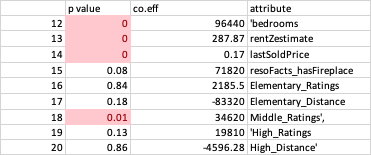

In [985]:
 # [ starts from index 14- 'bedrooms','rentZestimate','lastSoldPrice','resoFacts_hasFireplace','Elementary_Ratings','Elementary_Distance',
 #        'Middle_Ratings','Middle_Distance', 'High_Ratings','High_Distance' ]